## 1. Installating and Importing Libraries

In [ ]:
!pip install pycaret[full]

In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 15.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ipython
    Found existing installation: ipython 8.16.1
    Uninstalling ipython-8.16.1:
      Successfully uninstalled ipython-8.16.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Data and Overview

2.1 The data has been imported from the source link, unzipped, and a delimeter ";" has been identified as the seperator to covert it to a tabular format. The tables below show the feature columns along with more details on the values of the target column "Quality". The next steps are to check for missing values and duplicates. Quality has been changed to category and checked for data imbalance

In [ ]:
#import the data set directly from the source file
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip
!unzip -q wine.zip

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
data = pd.read_csv('winequality-red.csv' , delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

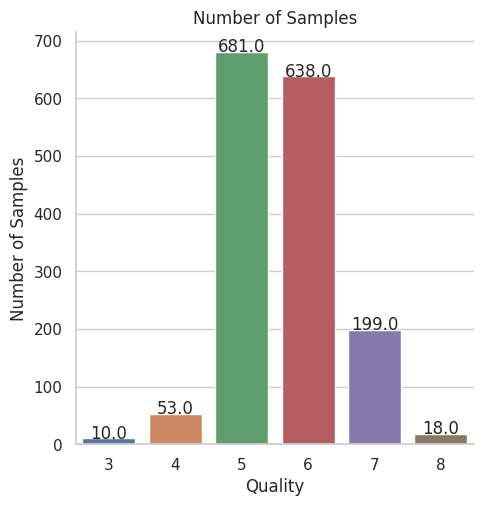

In [ ]:
# Catplot visualization to demonstrate the count
sns.set(style="whitegrid")
g = sns.catplot(x='quality', data=data, kind='count', palette='deep')

ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()


In [ ]:
data.shape

(1599, 12)

##### There is one element in the DataFrame for each row, and the DataFrame is not empty as shown below

In [ ]:
len(data) == data.shape[0]

True

In [ ]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


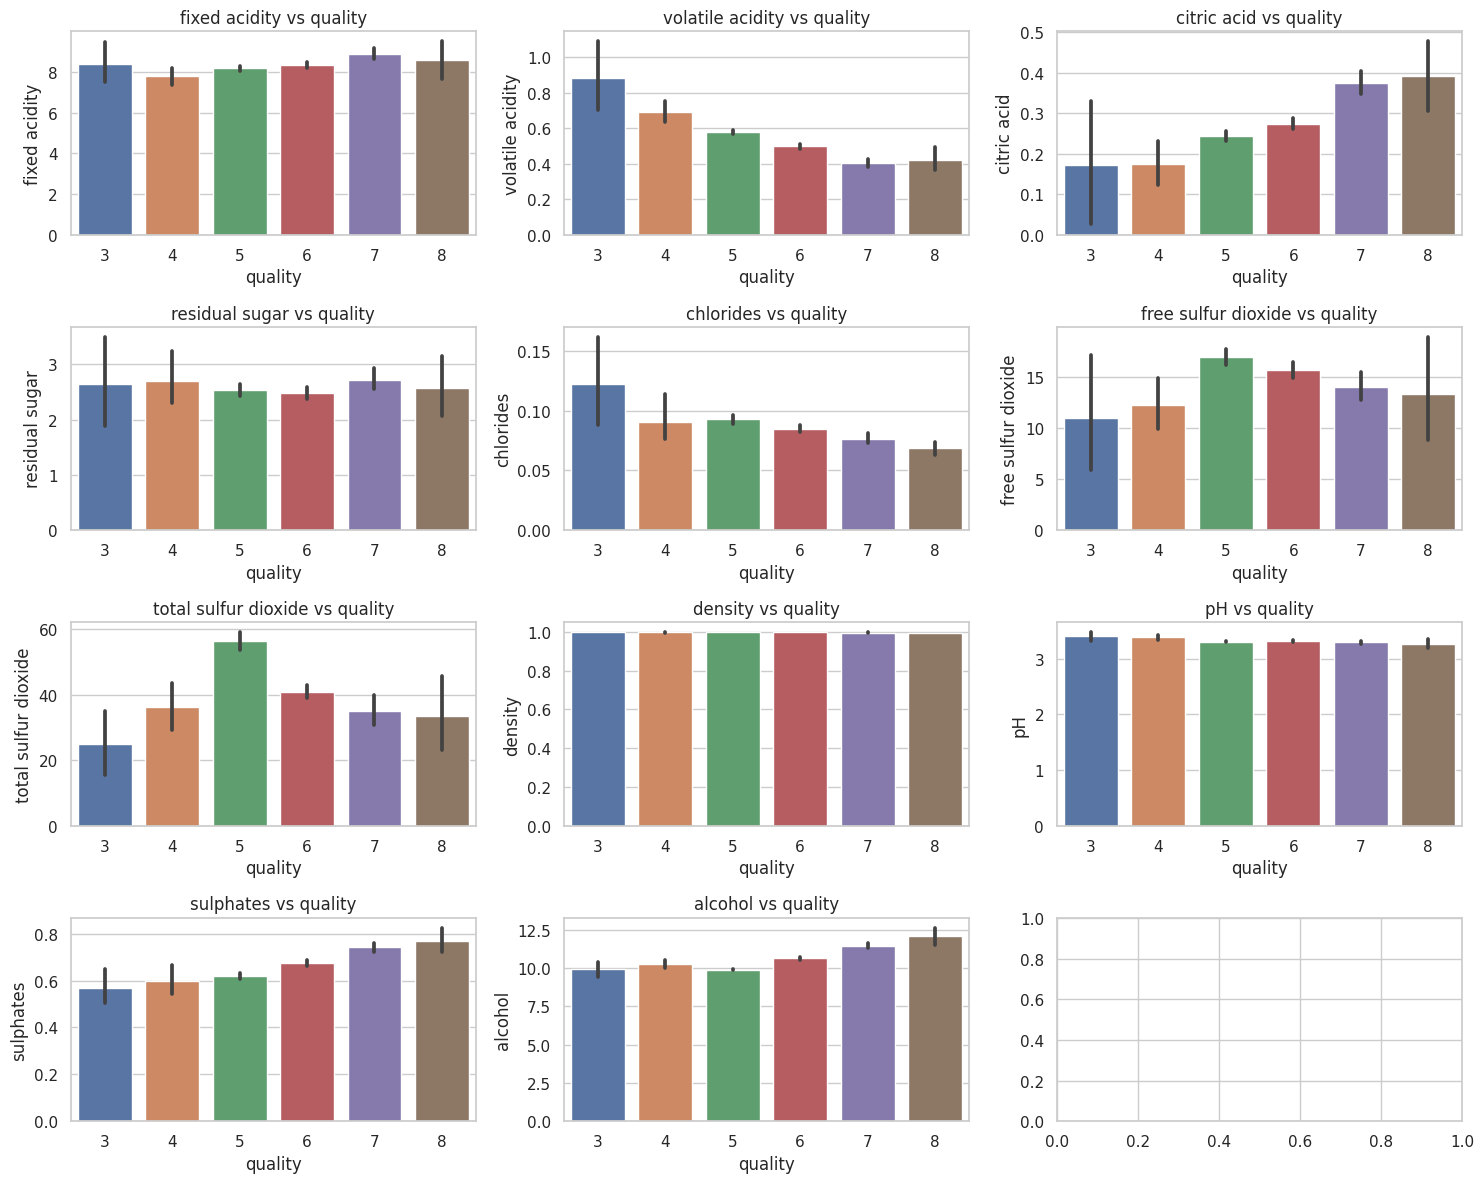

In [ ]:
# The features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} vs quality')

plt.tight_layout()

plt.show()

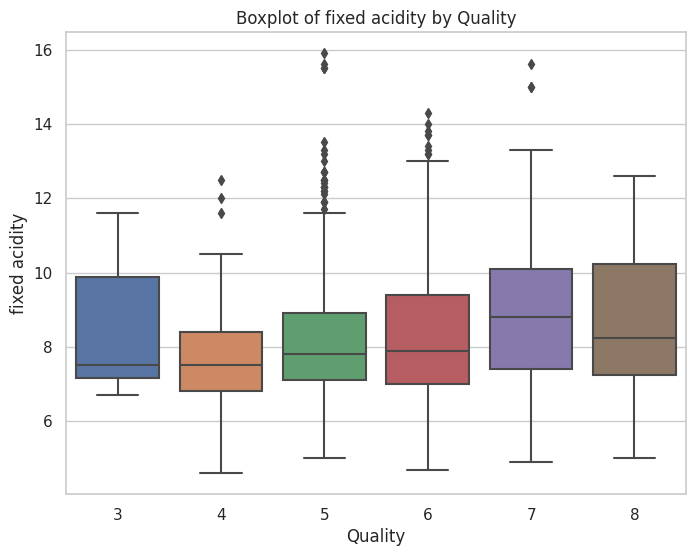

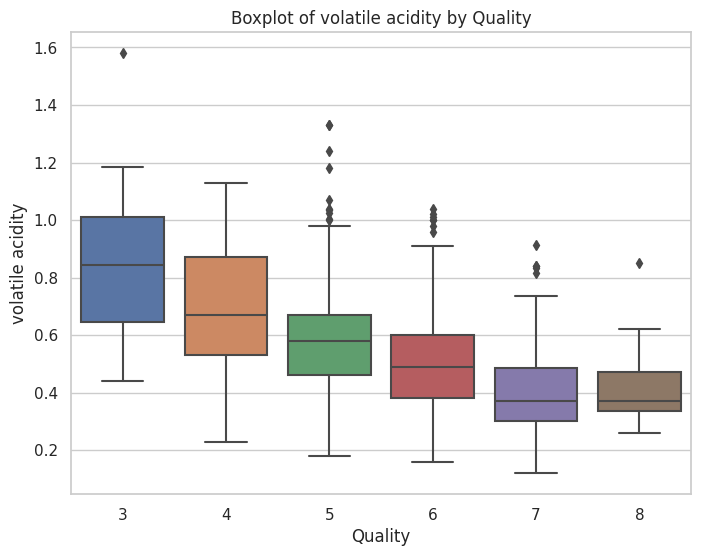

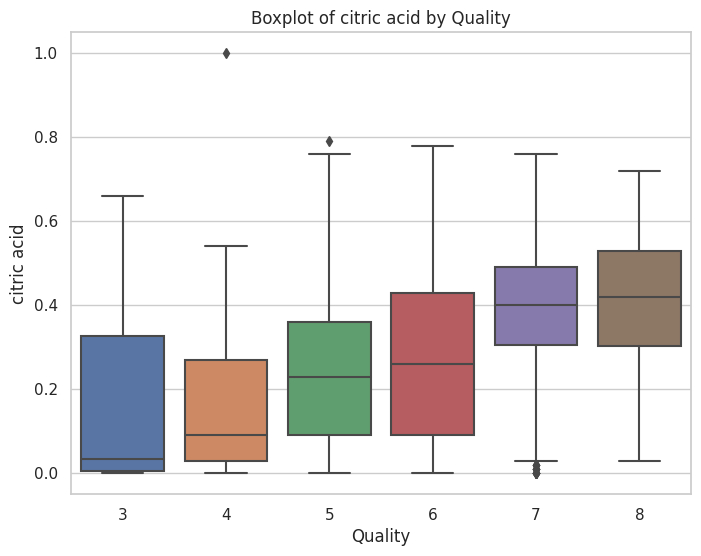

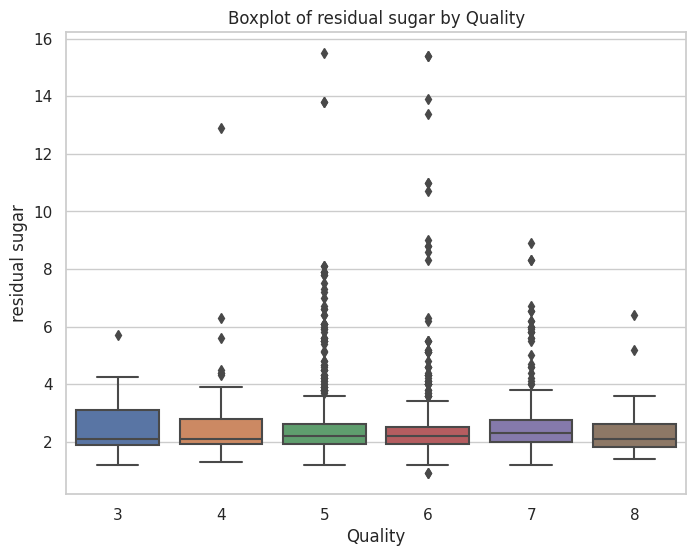

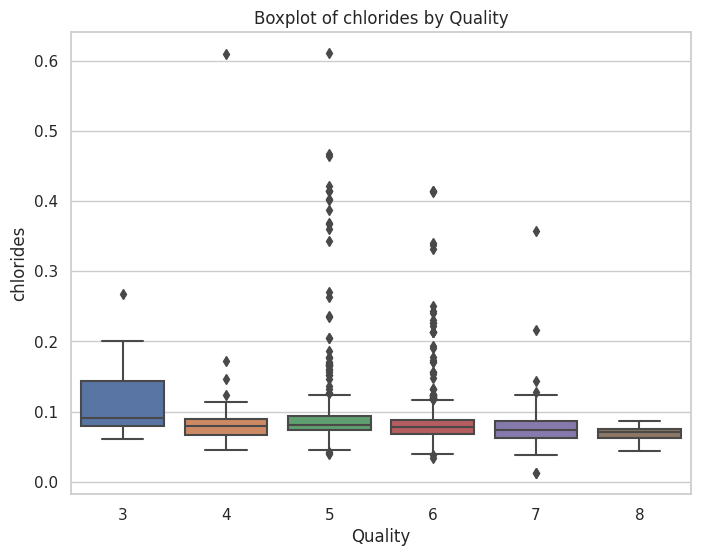

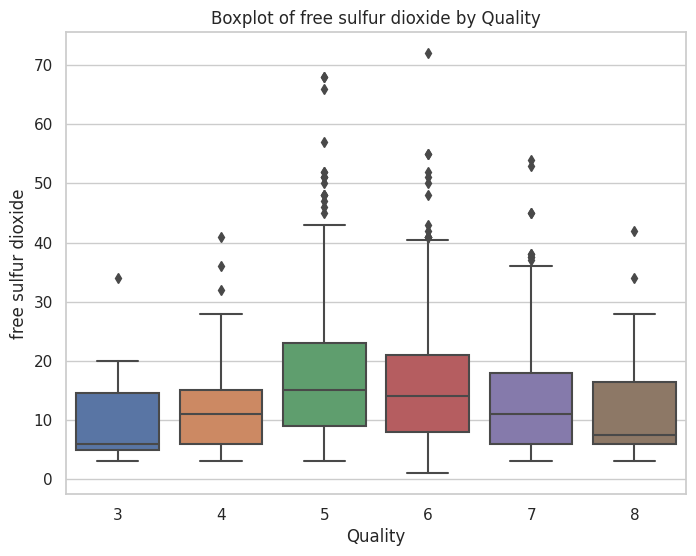

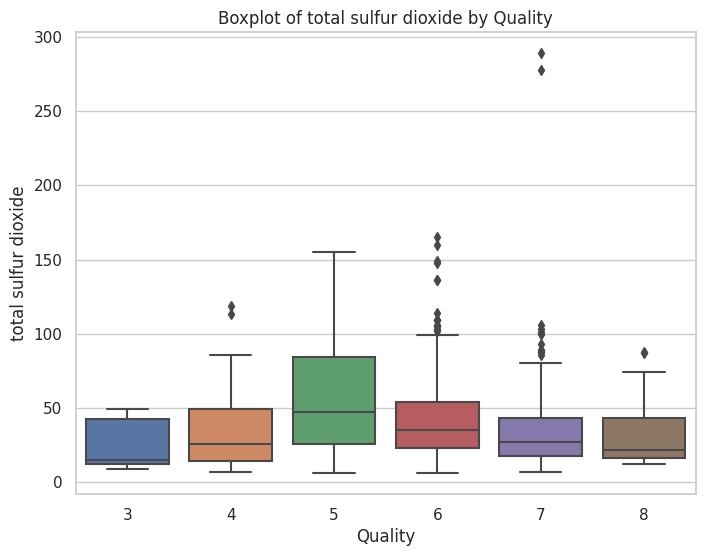

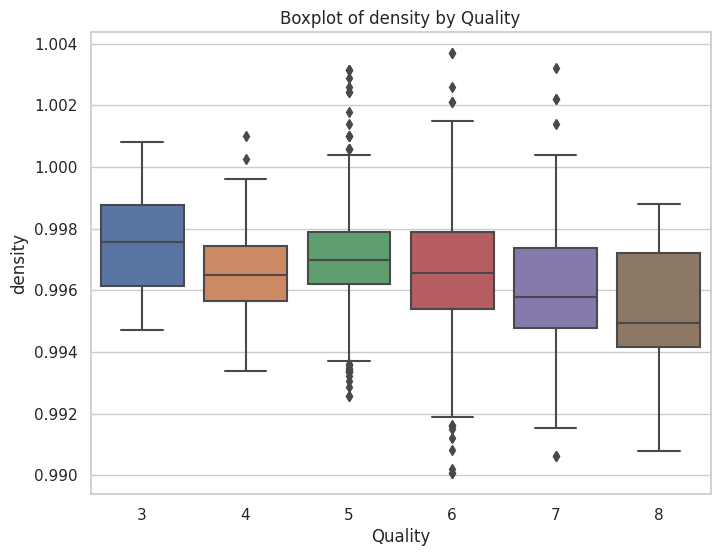

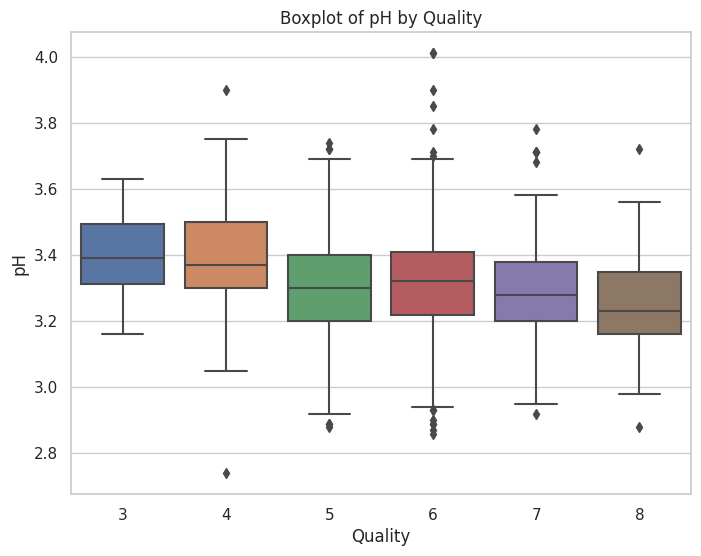

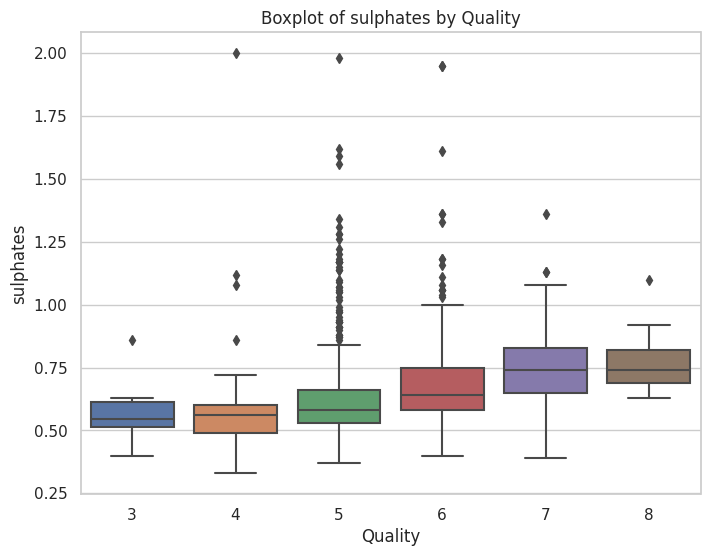

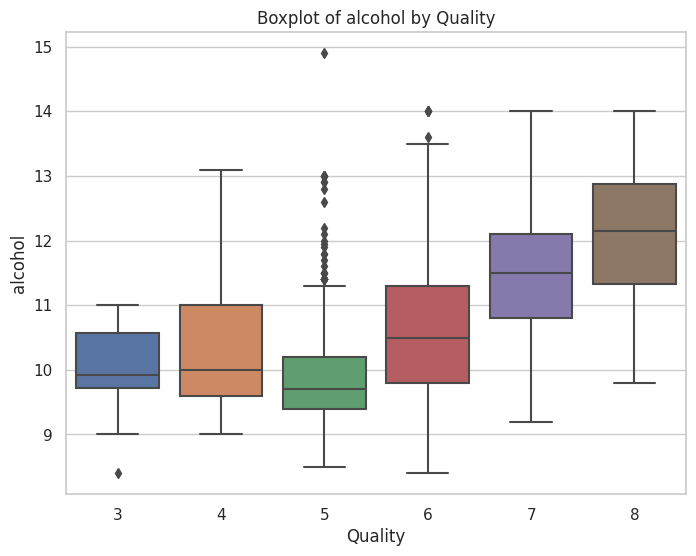

In [ ]:
 # The below graph shows boxplot grouped by 'quality'
for label in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=label, data=data)
    plt.title(f'Boxplot of {label} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(label)
    plt.show()


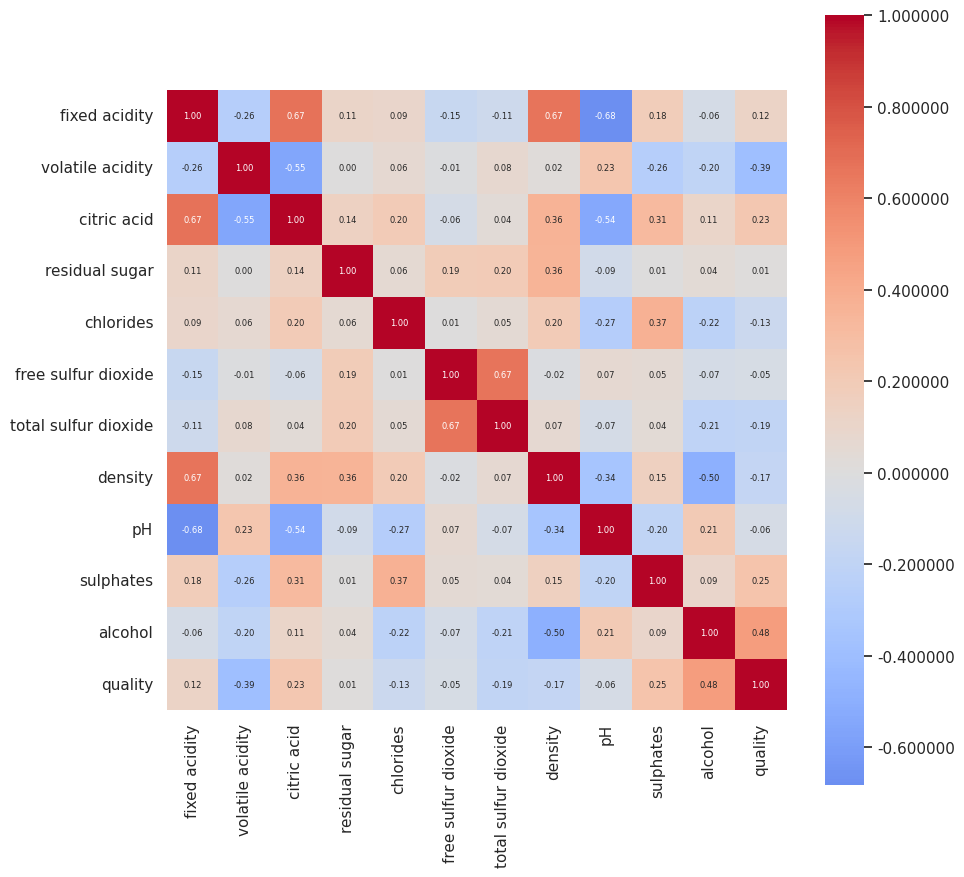

In [ ]:
# The correlation matrix
correlation = data.corr()

# Set the colormap to 'coolwarm'
cmap = 'coolwarm'

# Create the heatmap with the adjusted colormap and centered color scale
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 6}, cmap=cmap, center=0, cbar_kws={'format': '%1f'})
plt.show()



In [ ]:
# Check for missing values- as we can see below, there are no missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check for duplicate entries
duplicates = data[data.duplicated()]

# Display duplicate entries
print("Duplicate Entries:")
print(duplicates)

Duplicate Entries:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [ ]:
# Drop duplicate entries -240 rows
data = data.drop_duplicates()

In [ ]:
#data shape after deleting duplicates
data.shape

(1359, 12)

In [ ]:
data.quality.value_counts()
#the majority of duplicate data is in the "quality" of 5, 6 and 7 hence dropping duplicated will help with improving data imbalance

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

Pycaret Setup


In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

In [ ]:
# import pycaret classification and init setup, the train size has chosedn to be 0.8 due to small data size
from pycaret.classification import *
s= setup(data, target = 'quality', session_id=177, log_experiment=False,
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

,Description,Value
0,Session id,177
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1359, 12)"
5,Transformed data shape,"(1754, 12)"
6,Transformed train set shape,"(1346, 12)"
7,Transformed test set shape,"(408, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
train_data = get_config('X_train')


In [ ]:
validation_data = get_config('X_test')

In [ ]:
train_data.to_csv('train_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)

In [ ]:
print(get_config('X_train'))
print(get_config('X_test'))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1586            7.5             0.310         0.41            2.40      0.065   
1293            7.5             0.755         0.00            1.90      0.084   
982             7.3             0.520         0.32            2.10      0.070   
969             6.7             0.560         0.09            2.90      0.079   
1020           11.3             0.360         0.66            2.40      0.123   
...             ...               ...          ...             ...        ...   
444             5.3             0.570         0.01            1.70      0.054   
269            11.5             0.180         0.51            4.00      0.104   
999             6.4             0.690         0.00            1.65      0.055   
1002            9.1             0.290         0.33            2.05      0.063   
1462            6.8             0.640         0.03            2.30      0.075   

      free sulfur dioxide  

In [ ]:
# check the type of exp
type(s)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "sagemaker-rf-winequality"

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/train_data.csv')).upload_file('train_data.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/validation_data.csv')).upload_file('validation_data.csv')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [ ]:
! aws s3 ls $bucket/$prefix/data --recursive

2023-11-26 06:31:56      52842 sagemaker-rf-winequality/data/train_data.csv
2023-11-26 06:31:56      22727 sagemaker-rf-winequality/data/validation_data.csv


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5878,0.5223,0.5878,0.5602,0.5656,0.3306,0.3352,0.2180
catboost,CatBoost Classifier,0.5752,0.5256,0.5752,0.5496,0.5598,0.3235,0.3255,8.9710
rf,Random Forest Classifier,0.5657,0.5146,0.5657,0.5496,0.5469,0.2978,0.3015,0.2880
xgboost,Extreme Gradient Boosting,0.5636,0.5157,0.5636,0.5491,0.5524,0.3056,0.3074,0.3340
gbc,Gradient Boosting Classifier,0.5583,0.5089,0.5583,0.5511,0.5513,0.3054,0.3068,1.3150
lightgbm,Light Gradient Boosting Machine,0.5520,0.5125,0.5520,0.5288,0.5345,0.2822,0.2851,0.7850
lr,Logistic Regression,0.5353,0.5120,0.5353,0.5547,0.5333,0.2774,0.2808,0.6270
knn,K Neighbors Classifier,0.5310,0.4710,0.5310,0.5227,0.5230,0.2627,0.2646,0.0760
qda,Quadratic Discriminant Analysis,0.5289,0.4913,0.5289,0.5110,0.5177,0.2646,0.2659,0.0600
lda,Linear Discriminant Analysis,0.5216,0.5111,0.5216,0.5443,0.5296,0.2807,0.2833,0.0610


In [ ]:
# compare models using OOP
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7392,0.8185,0.7392,0.7424,0.7386,0.4899,0.4928,0.2080
rf,Random Forest Classifier,0.7371,0.8191,0.7371,0.7431,0.7383,0.4887,0.4908,0.3030
xgboost,Extreme Gradient Boosting,0.7297,0.8083,0.7297,0.7373,0.7316,0.4774,0.4793,0.2080
lightgbm,Light Gradient Boosting Machine,0.7214,0.7991,0.7214,0.7264,0.7225,0.4592,0.4606,0.4880
catboost,CatBoost Classifier,0.7213,0.8147,0.7213,0.7283,0.7233,0.4591,0.4609,5.2870
gbc,Gradient Boosting Classifier,0.7182,0.8074,0.7182,0.7360,0.7251,0.4626,0.4650,0.7370
qda,Quadratic Discriminant Analysis,0.7066,0.7803,0.7066,0.7037,0.7044,0.4235,0.4245,0.0680
knn,K Neighbors Classifier,0.6572,0.7381,0.6572,0.7054,0.6777,0.3709,0.3753,0.0790
lr,Logistic Regression,0.6541,0.7594,0.6541,0.7228,0.6778,0.3887,0.3996,0.0720
ada,Ada Boost Classifier,0.6425,0.6122,0.6425,0.6735,0.6430,0.3289,0.3422,0.1540


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=177, verbose=0, warm_start=False)

In [ ]:
import sagemaker
region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
AWS Region: us-east-1
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
RoleArn: arn:aws:iam::244447087650:role/service-role/SageMaker-Student-3608


In [ ]:
sagemaker.__version__

'2.197.0'

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Now, convert the DataFrame to a NumPy array
numpy_array = data.to_numpy()


In [ ]:
from sagemaker import RandomCutForest

session = sagemaker.Session()
execution_role = sagemaker.get_execution_role()

# specify general training job information
rcf = RandomCutForest(
    role=execution_role,
    instance_count=1,
    instance_type="ml.m4.xlarge",
    data_location=f"s3://{bucket}/{prefix}/",
    output_path=f"s3://{bucket}/{prefix}/output",
    num_samples_per_tree=512,
    num_trees=50,
)

# automatically upload the training data to S3 and run the training job
rcf.fit(rcf.record_set(data.quality.to_numpy().reshape(-1, 1)))



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: randomcutforest-2023-11-26-07-01-34-762


2023-11-26 07:01:34 Starting - Starting the training job...
2023-11-26 07:02:00 Starting - Preparing the instances for training............
2023-11-26 07:03:37 Downloading - Downloading input data...
2023-11-26 07:04:07 Training - Downloading the training image..................
2023-11-26 07:07:23 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
[11/26/2023 07:07:43 INFO 140661292123968] Reading default 

In [ ]:
print(rcf)

In [ ]:
training_job_name = rcf.latest_training_job.name
training_job_info = sagemaker_session.sagemaker_client.describe_training_job(TrainingJobName=training_job_name)
status = training_job_info['TrainingJobStatus']

In [ ]:
endpoint_config_name = "new-rcf-endpoint-config1"

In [ ]:
rcf_predictor = rcf.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge",
    endpoint_name='new-rcf-endpoint-config1'
)


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: randomcutforest-2023-11-26-07-44-36-431
INFO:sagemaker:Creating endpoint-config with name new-rcf-endpoint-config1
INFO:sagemaker:Creating endpoint with name new-rcf-endpoint-config1


--------!

In [ ]:
# Check data types of each column
print(new_data.dtypes)

# Convert non-numeric columns to numeric (assuming 'new_data' is your DataFrame)
new_data = new_data.apply(pd.to_numeric, errors='coerce')

# Verify that all data types are numeric now
print(new_data.dtypes)

# Drop rows with missing values if any
new_data = new_data.dropna()

# Convert the DataFrame to a NumPy array
new_data_array = new_data.values


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality_category        float64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality_category        float64
dtype: object


In [ ]:
import numpy as np
def predict(data, rows=600):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions - ''
    for array in split_array:
        predictions - ','.join([predictions, rcf.predict(array).decode('utf-8')])
        return np.fromstring(predictions[1:], sep=',')